In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [2]:
# Load Data
df = pd.read_csv("5241dataset.csv", encoding = 'unicode_escape')

/var/folders/8r/f8xs7ssj5375m_ymty13gnww0000gn/T/ipykernel_34792/1370471252.py:2: DtypeWarning: Columns (27,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("5241dataset.csv", encoding = 'unicode_escape')


## 1. Dataset Description

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34931 entries, 0 to 34930
Data columns (total 49 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Record number                           34931 non-null  int64  
 1   Individual ID                           33200 non-null  float64
 2   Predator                                34931 non-null  object 
 3   Predator common name                    34931 non-null  object 
 4   Predator taxon                          34931 non-null  object 
 5   Predator lifestage                      34931 non-null  object 
 6   Type of feeding interaction             34931 non-null  object 
 7   Predator length                         34931 non-null  float64
 8   Predator length unit                    34931 non-null  object 
 9   Predator standard length                34930 non-null  float64
 10  Predator total length                   34818 non-null  fl

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Record number,34931.0,17466.000000,10083.855463,1.000000e+00,8733.50000,17466.0000,26198.500,34931.000
Individual ID,33200.0,7767.209699,5603.773065,1.000000e+00,2066.75000,7000.0000,12885.250,17668.000
Predator length,34931.0,411.708758,865.149724,3.000000e+00,67.50000,200.0000,570.000,17490.000
Predator standard length,34930.0,275.498247,851.527130,0.000000e+00,18.50000,92.0000,287.360,17490.000
Predator total length,34818.0,410.125251,891.934132,0.000000e+00,73.41000,210.0000,570.000,22423.000
Standardised predator length,34931.0,68.362248,53.988482,3.000000e-01,28.92000,68.0000,94.000,309.690
Predator mass,34931.0,15292.363560,46260.898001,1.140000e-04,172.01000,1751.1000,6325.500,415600.000
Predator mass check,34931.0,57433.601425,142121.384771,1.413000e-03,1265.80000,16455.0000,43467.000,1554400.000
Predator mass check diff,34931.0,42141.261535,97206.742764,1.298700e-03,995.64000,12997.0000,37417.000,1174300.000
Predator ratio mass/mass,34931.0,7.488458,5.037282,1.053500e+00,4.11160,6.5149,10.104,79.568


## 2. Data Cleaning

### 2.1 Missing Values

The columns contain missing values are:
 Index(['Individual ID', 'Predator standard length', 'Predator total length',
       'Predator TL/FL/SL conversion reference', 'Prey length unit',
       'Prey width', 'Prey width unit'],
      dtype='object')


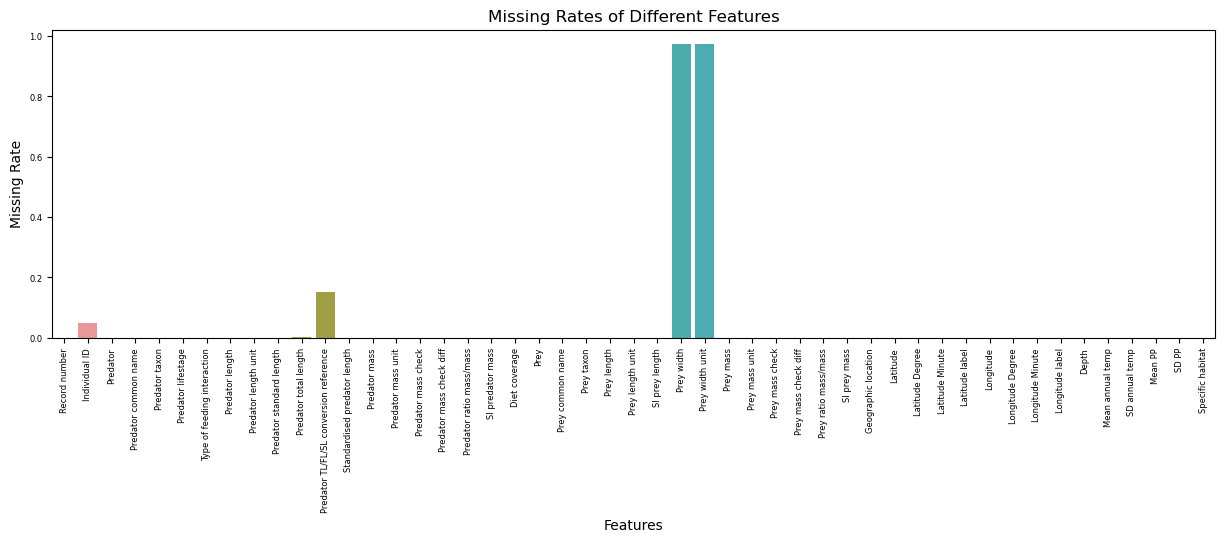

In [5]:
col_na = df.columns[df.isna().any()]
col_na_ratio = df.isna().sum()/df.shape[0]

print("The columns contain missing values are:\n", col_na)

fig,ax = plt.subplots(figsize=(15,4))
sns.barplot(x = df.columns, y = col_na_ratio, ax = ax)

ax.tick_params(axis = 'x', rotation = 90)
ax.set_xlabel('Features')
ax.set_ylabel('Missing Rate')
ax.set_title('Missing Rates of Different Features')

plt.tick_params(labelsize=6)
plt.show()

In [6]:
df.drop(['Individual ID','Predator TL/FL/SL conversion reference','Prey width','Prey width unit'], axis = 1, inplace = True)

In [7]:
df.columns

Index(['Record number', 'Predator', 'Predator common name', 'Predator taxon',
       'Predator lifestage', 'Type of feeding interaction', 'Predator length',
       'Predator length unit', 'Predator standard length',
       'Predator total length', 'Standardised predator length',
       'Predator mass', 'Predator mass unit', 'Predator mass check',
       'Predator mass check diff', 'Predator ratio mass/mass',
       'SI predator mass', 'Diet coverage', 'Prey', 'Prey common name',
       'Prey taxon', 'Prey length', 'Prey length unit', 'SI prey length',
       'Prey mass', 'Prey mass unit', 'Prey mass check',
       'Prey mass check diff', 'Prey ratio mass/mass', 'SI prey mass',
       'Geographic location', 'Latitude', 'Latitude Degree', 'Latitude Minute',
       'Latitude label', 'Longitude', 'Longitude Degree', 'Longitude Minute',
       'Longitude label', 'Depth', 'Mean annual temp', 'SD annual temp',
       'Mean PP', 'SD PP', 'Specific habitat'],
      dtype='object')

### 2.2 Dataset Split

In [8]:
df_predator = df[['Record number', 'Predator', 'Predator common name', 'Predator taxon',
                'Predator lifestage', 'Type of feeding interaction', 'Predator length',
                'Predator length unit', 'Predator standard length','Predator total length', 
                'Standardised predator length','Predator mass', 'Predator mass unit', 'Predator mass check',
                'Predator mass check diff', 'Predator ratio mass/mass','SI predator mass', 'Diet coverage',
                'Geographic location', 'Latitude', 'Latitude Degree', 'Latitude Minute','Latitude label', 
                'Longitude', 'Longitude Degree', 'Longitude Minute','Longitude label', 'Depth', 
                'Mean annual temp', 'SD annual temp','Mean PP', 'SD PP', 'Specific habitat']]
df_prey = df[['Prey', 'Prey common name', 'Prey taxon', 'Prey length', 'Prey length unit', 'SI prey length',
                'Prey mass', 'Prey mass unit', 'Prey mass check', 'Prey mass check diff', 'Prey ratio mass/mass', 
                'SI prey mass', 'Geographic location', 'Latitude', 'Latitude Degree', 'Latitude Minute',
                'Latitude label', 'Longitude', 'Longitude Degree', 'Longitude Minute','Longitude label', 
                'Depth', 'Mean annual temp', 'SD annual temp','Mean PP', 'SD PP', 'Specific habitat']]

In [9]:
#major_predator = df_predator['Predator common name'].value_counts()/df_predator.shape[0] >= 0.05
#major_predator_names = major_predator[major_predator == True].index
#major_predator_names

In [10]:
#df_names = []
#for name in major_predator_names:
#    df_names.append(df_predator[df_predator['Predator common name'] == name])
#df_predator = pd.concat(df_names, ignore_index= True)

#### 2.2.1 Predator Dataframe

In [11]:
df_predator['Predator length unit'].value_counts()

mm    22069
cm    12423
µm      439
Name: Predator length unit, dtype: int64

In [12]:
for i in range(df_predator.shape[0]):
    if df_predator['Predator length unit'][i] == 'mm':
        df_predator['Predator length'][i] = df_predator['Predator length'][i]*0.1
    if df_predator['Predator length unit'][i] == 'µm':
        df_predator['Predator length'][i] = df_predator['Predator length'][i]*0.0001
    else:
        continue

/var/folders/8r/f8xs7ssj5375m_ymty13gnww0000gn/T/ipykernel_34792/556351888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predator['Predator length'][i] = df_predator['Predator length'][i]*0.1
/var/folders/8r/f8xs7ssj5375m_ymty13gnww0000gn/T/ipykernel_34792/556351888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predator['Predator length'][i] = df_predator['Predator length'][i]*0.0001


In [13]:
df_predator['Predator mass unit'].value_counts()

g    34931
Name: Predator mass unit, dtype: int64

In [14]:
df_predator.drop(['Predator length unit'], axis = 1, inplace = True)

/var/folders/8r/f8xs7ssj5375m_ymty13gnww0000gn/T/ipykernel_34792/2564476634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predator.drop(['Predator length unit'], axis = 1, inplace = True)


In [15]:
major_predator = df_predator['Predator common name'].value_counts()/df_predator.shape[0] >= 0.05
major_predator_names = major_predator[major_predator == True].index
major_predator_names

Index(['Albacore', 'Spurdog / spiny dogfish', 'Atlantic cod', 'Yellowfin tuna',
       'Atlantic bluefin tuna', 'Bigeye tuna'],
      dtype='object')

In [16]:
df_names = []
for name in major_predator_names:
    df_names.append(df_predator[df_predator['Predator common name'] == name])
df_predator_new = pd.concat(df_names, ignore_index= True)

In [17]:
predator_y = df_predator_new['Predator common name']
predator_x = df_predator_new[['Predator taxon','Predator lifestage', 'Type of feeding interaction','Predator length','Predator mass',
                            'Diet coverage','Geographic location','Depth','Mean annual temp', 'Mean PP', 'Specific habitat']]

#### 2.2.2 Prey Dataframe

In [18]:
df_prey['Prey length unit'].value_counts()

mm    22471
cm    11489
µm      969
Name: Prey length unit, dtype: int64

In [19]:
for i in range(df_prey.shape[0]):
    if df_prey['Prey length unit'][i] == 'mm':
        df_prey['Prey length'][i] = df_prey['Prey length'][i]*0.1
    if df_prey['Prey length unit'][i] == 'µm':
        df_prey['Prey length'][i] = df_prey['Prey length'][i]*0.0001
    else:
        continue

/var/folders/8r/f8xs7ssj5375m_ymty13gnww0000gn/T/ipykernel_34792/946970684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prey['Prey length'][i] = df_prey['Prey length'][i]*0.1
/var/folders/8r/f8xs7ssj5375m_ymty13gnww0000gn/T/ipykernel_34792/946970684.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prey['Prey length'][i] = df_prey['Prey length'][i]*0.0001


In [20]:
df_prey['Prey mass unit'].value_counts()

g     34728
mg      203
Name: Prey mass unit, dtype: int64

In [21]:
for i in range(df_prey.shape[0]):
    if df_prey['Prey mass unit'][i] == 'mg':
        df_prey['Prey mass'][i] = df_prey['Prey mass'][i]*0.001
    else:
        continue

/var/folders/8r/f8xs7ssj5375m_ymty13gnww0000gn/T/ipykernel_34792/1295962586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prey['Prey mass'][i] = df_prey['Prey mass'][i]*0.001


In [22]:
df_prey.drop(['Prey length unit','Prey mass unit'], axis = 1, inplace = True)

/var/folders/8r/f8xs7ssj5375m_ymty13gnww0000gn/T/ipykernel_34792/3688790300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prey.drop(['Prey length unit','Prey mass unit'], axis = 1, inplace = True)


In [23]:
prey_y = df_prey['Prey taxon']
prey_x = df_prey[['Prey length','Prey mass', 'Geographic location','Depth', 'Mean annual temp', 'Mean PP', 'Specific habitat']]

## 3. Data Visualization

### 3.1 Correlations of Independent Variables

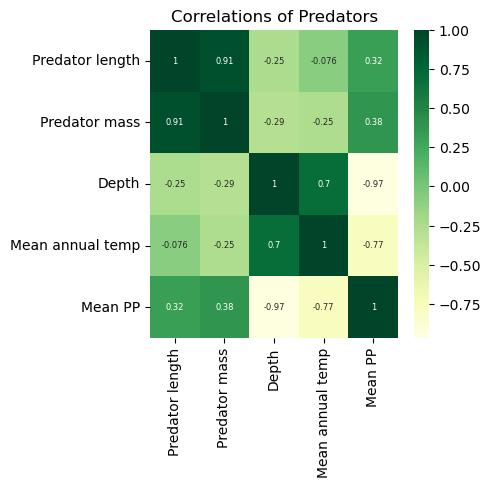

In [24]:
# Predators
corr_matrix = predator_x.corr()
fig = plt.figure(figsize = (4,4))
plt.title('Correlations of Predators')
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":6}, center=0, cmap="YlGn")
plt.show()

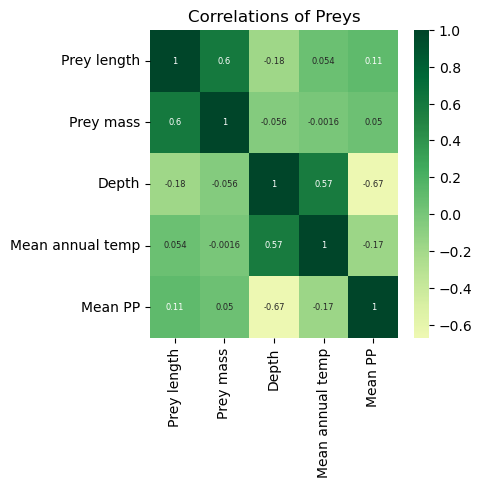

In [25]:
# Preys
corr_matrix = prey_x.corr()
fig = plt.figure(figsize = (4,4))
plt.title('Correlations of Preys')
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":6}, center=0, cmap="YlGn")
plt.show()

### 3.2 Distribution of Dependent Variable

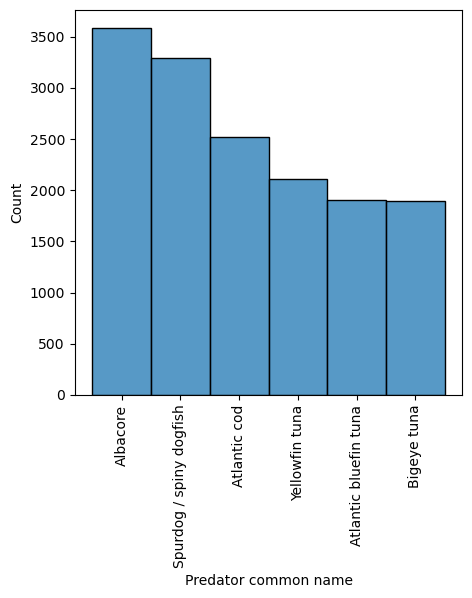

In [26]:
fig, ax=plt.subplots(figsize=(5,5))
sns.histplot(predator_y, ax=ax)
plt.xticks(rotation = 90)
plt.show()

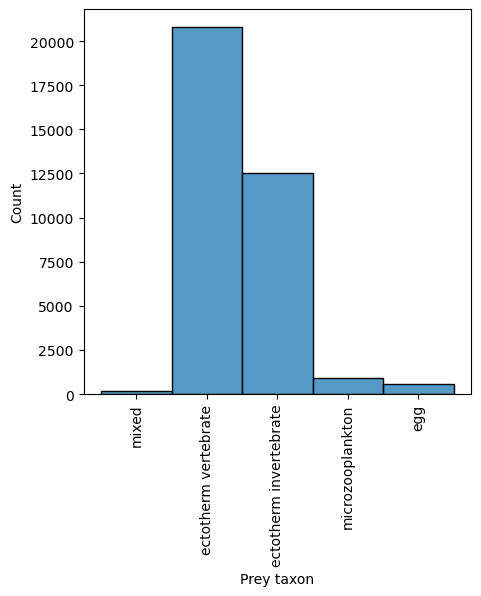

In [27]:
fig, ax=plt.subplots(figsize=(5,5))
sns.histplot(prey_y, ax=ax)
plt.xticks(rotation = 90)
plt.show()

## 4. Classification Model

### 4.1 Classify Predator common names

In [28]:
# Categorical Feature Encoding 
ordinalencoder = OrdinalEncoder()
predator_x['Predator taxon'] = ordinalencoder.fit_transform(predator_x[['Predator taxon']]).reshape(1,-1).tolist()[0]
predator_x['Predator lifestage'] = ordinalencoder.fit_transform(predator_x[['Predator lifestage']]).reshape(1,-1).tolist()[0]
predator_x['Type of feeding interaction'] = ordinalencoder.fit_transform(predator_x[['Type of feeding interaction']]).reshape(1,-1).tolist()[0]
predator_x['Diet coverage'] = ordinalencoder.fit_transform(predator_x[['Diet coverage']]).reshape(1,-1).tolist()[0]
predator_x['Geographic location'] = ordinalencoder.fit_transform(predator_x[['Geographic location']]).reshape(1,-1).tolist()[0]
predator_x['Specific habitat'] = ordinalencoder.fit_transform(predator_x[['Specific habitat']]).reshape(1,-1).tolist()[0]

/var/folders/8r/f8xs7ssj5375m_ymty13gnww0000gn/T/ipykernel_34792/116639362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predator_x['Predator taxon'] = ordinalencoder.fit_transform(predator_x[['Predator taxon']]).reshape(1,-1).tolist()[0]
/var/folders/8r/f8xs7ssj5375m_ymty13gnww0000gn/T/ipykernel_34792/116639362.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predator_x['Predator lifestage'] = ordinalencoder.fit_transform(predator_x[['Predator lifestage']]).reshape(1,-1).tolist()[0]
/var/folders/8

In [29]:
# Train Test Split
X_train_predator, X_test_predator, y_train_predator, y_test_predator = train_test_split(predator_x, 
                                                                                        predator_y, 
                                                                                        test_size=0.2, 
                                                                                        random_state=123)

# Scaling
scaler = StandardScaler()
X_train_predator = scaler.fit_transform(X_train_predator)   
X_test_predator = scaler.transform(X_test_predator)   

#### 4.1.1 SVC

In [30]:
svc = SVC(C=1,gamma='scale')
svc.fit(X_train_predator,y_train_predator)
print(f"The train score is:",svc.score(X_train_predator,y_train_predator))
print(f"The test score is:",svc.score(X_test_predator,y_test_predator))

The train score is: 0.893172165958837
The test score is: 0.8919007184846506


In [31]:
# Grid Search
params = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],'kernel': ['rbf', 'poly', 'sigmoid']}
svc_gscv = GridSearchCV(estimator = SVC(random_state=123), param_grid=params, cv=3, refit=True, n_jobs=-1)
svc_gscv.fit(X_train_predator, y_train_predator)
print(f'svc best hyperparams      : {svc_gscv.best_params_}')
print(f'svc best mean cv accuracy : {svc_gscv.best_score_:.2f}')

svc best hyperparams      : {'C': 10, 'gamma': 1, 'kernel': 'poly'}
svc best mean cv accuracy : 1.00


#### 4.1.2 Decision Tree

In [32]:
dt = DecisionTreeClassifier(criterion='gini', max_depth = 5)
dt.fit(X_train_predator,y_train_predator)
print(f"The train score is:",dt.score(X_train_predator,y_train_predator))
print(f"The test score is:",dt.score(X_test_predator,y_test_predator))

The train score is: 0.8951323097027115
The test score is: 0.8909209666884389


In [33]:
# Grid Search
params = {'criterion': ['gini', 'entropy'], 'max_depth' : [2,3,4,5,6]}
dt_gscv = GridSearchCV(estimator = DecisionTreeClassifier(random_state=123), param_grid=params, cv=3, refit=True, n_jobs=-1)
dt_gscv.fit(X_train_predator, y_train_predator)
print(f'dt best hyperparams      : {dt_gscv.best_params_}')
print(f'dt best mean cv accuracy : {dt_gscv.best_score_:.2f}')

dt best hyperparams      : {'criterion': 'entropy', 'max_depth': 6}
dt best mean cv accuracy : 0.95


#### 4.1.3 Random Forest

In [34]:
# normal random forest
rfc = RandomForestClassifier(n_estimators=50, max_depth=5)
rfc.fit(X_train_predator,y_train_predator)
print(f"The train score is:",rfc.score(X_train_predator,y_train_predator))
print(f"The test score is:",rfc.score(X_test_predator,y_test_predator))

The train score is: 0.9001960143743875
The test score is: 0.8990855649902025


In [35]:
# cross validation
rfc_cv_scores = cross_val_score(rfc, X_train_predator, y_train_predator, cv=5, n_jobs=-1)
rfc_cv_scores

array([0.9003675 , 0.90281748, 0.89587587, 0.89914251, 0.90645425])

In [36]:
depths = [2,4,6,8,10]
train_scores,test_scores = validation_curve(RandomForestClassifier(n_estimators=50), 
                                            X_train_predator, y_train_predator, 
                                            param_name='max_depth', param_range=depths, cv=3)
mean_train_scores = np.average(train_scores, axis=1)
mean_test_scores = np.average(test_scores, axis=1)
pd.DataFrame([mean_train_scores.round(2),mean_test_scores.round(2)],
             columns=pd.Series(depths,name='max_depth'),
             index=['mean_train_scores','mean_test_scores'])


max_depth,2,4,6,8,10
mean_train_scores,0.72,0.87,0.91,0.97,1.00
mean_test_scores,0.72,0.87,0.91,0.96,0.99


In [37]:
# Grid Search
params = {'n_estimators':[10,50,100,150],'max_depth':[2,3,4,5,6]}
rfc_gscv = GridSearchCV(estimator=RandomForestClassifier(random_state=123), param_grid=params, cv=3, refit=True, n_jobs=-1)
rfc_gscv.fit(X_train_predator, y_train_predator)
print(f'rfc best hyperparams      : {rfc_gscv.best_params_}')
print(f'rfc best mean cv accuracy : {rfc_gscv.best_score_:.2f}')

rfc best hyperparams      : {'max_depth': 6, 'n_estimators': 10}
rfc best mean cv accuracy : 0.92


#### 4.1.4 Adaboost

In [38]:
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1)
ada.fit(X_train_predator,y_train_predator)
print(f"The train score is:",ada.score(X_train_predator,y_train_predator))
print(f"The test score is:",ada.score(X_test_predator,y_test_predator))

The train score is: 0.4780300555374061
The test score is: 0.48171129980404964


In [39]:
# Grid Search
params = {'n_estimators':[10,50,100,150],'learning_rate':[0.01,0.1,0.5,1]}
ada_gscv = GridSearchCV(estimator=AdaBoostClassifier(random_state=123), param_grid=params, cv=3, refit=True, n_jobs=-1)
ada_gscv.fit(X_train_predator, y_train_predator)
print(f'ada best hyperparams      : {ada_gscv.best_params_}')
print(f'ada best mean cv accuracy : {ada_gscv.best_score_:.2f}')

ada best hyperparams      : {'learning_rate': 0.5, 'n_estimators': 50}
ada best mean cv accuracy : 0.83


### 4.2 Classify Prey taxon

In [40]:
ordinalencoder = OrdinalEncoder()
prey_x['Geographic location'] = ordinalencoder.fit_transform(prey_x[['Geographic location']]).reshape(1,-1).tolist()[0]
prey_x['Specific habitat'] = ordinalencoder.fit_transform(prey_x[['Specific habitat']]).reshape(1,-1).tolist()[0]

/var/folders/8r/f8xs7ssj5375m_ymty13gnww0000gn/T/ipykernel_34792/3909440097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prey_x['Geographic location'] = ordinalencoder.fit_transform(prey_x[['Geographic location']]).reshape(1,-1).tolist()[0]
/var/folders/8r/f8xs7ssj5375m_ymty13gnww0000gn/T/ipykernel_34792/3909440097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prey_x['Specific habitat'] = ordinalencoder.fit_transform(prey_x[['Specific habitat']]).reshape(1,-1).tolist()[0]


In [41]:
from sklearn.model_selection import train_test_split

# Train Test Split
X_train_prey, X_test_prey, y_train_prey, y_test_prey = train_test_split(prey_x, 
                                                                        prey_y, 
                                                                        test_size=0.2, 
                                                                        random_state=123)

# Scaling
scaler = StandardScaler()
X_train_prey = scaler.fit_transform(X_train_prey)   
X_test_prey = scaler.transform(X_test_prey)

#### 4.2.1 SVC

In [42]:
svc = SVC(C=1,gamma='scale')
svc.fit(X_train_prey,y_train_prey)
print(f"The train score is:",svc.score(X_train_prey,y_train_prey))
print(f"The test score is:",svc.score(X_test_prey,y_test_prey))

The train score is: 0.8626896650443745
The test score is: 0.8605982539001001


In [43]:
# Grid Search - so slow
params = {'C': [0.1, 1, 10], 'gamma': [1, 0.1],'kernel': ['rbf', 'poly']}
svc_gscv = GridSearchCV(estimator = SVC(random_state=123), param_grid=params, cv=3, refit=True, n_jobs=-1)
svc_gscv.fit(X_train_prey, y_train_prey)
print(f'svc best hyperparams      : {svc_gscv.best_params_}')
print(f'svc best mean cv accuracy : {svc_gscv.best_score_:.2f}')

/Users/jingyi/opt/anaconda3/envs/MyCodingSpace/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

#### 4.2.2 Decision Tree

In [44]:
dt = DecisionTreeClassifier(criterion='gini', max_depth = 5)
dt.fit(X_train_prey,y_train_prey)
print(f"The train score is:",dt.score(X_train_prey,y_train_prey))
print(f"The test score is:",dt.score(X_test_prey,y_test_prey))

The train score is: 0.8502004008016032
The test score is: 0.8512952626305997


In [45]:
# Grid Search
params = {'criterion': ['gini', 'entropy'], 'max_depth' : [2,3,4,5,6]}
dt_gscv = GridSearchCV(estimator = DecisionTreeClassifier(random_state=123), param_grid=params, cv=3, refit=True, n_jobs=-1)
dt_gscv.fit(X_train_prey, y_train_prey)
print(f'decision tree best hyperparams      : {dt_gscv.best_params_}')
print(f'decision tree best mean cv accuracy : {dt_gscv.best_score_:.2f}')

decision tree best hyperparams      : {'criterion': 'gini', 'max_depth': 6}
decision tree best mean cv accuracy : 0.90


#### 4.2.3 Random Forest

In [46]:
# normal random forest
rfc = RandomForestClassifier(n_estimators=50, max_depth=5)
rfc.fit(X_train_prey,y_train_prey)
print(f"The train score is:",rfc.score(X_train_prey,y_train_prey))
print(f"The test score is:",rfc.score(X_test_prey,y_test_prey))

The train score is: 0.8643358144861151
The test score is: 0.8648919421783312


In [47]:
# cross validation
rfc_cv_scores = cross_val_score(rfc, X_train_prey, y_train_prey, cv=5, n_jobs=-1)
rfc_cv_scores

array([0.86276615, 0.85399893, 0.85256754, 0.8459474 , 0.84037223])

In [48]:
depths = [2,4,6,8,10]
train_scores,test_scores = validation_curve(RandomForestClassifier(n_estimators=50), 
                                            X_train_prey, y_train_prey, 
                                            param_name='max_depth', param_range=depths, cv=3)
mean_train_scores = np.average(train_scores, axis=1)
mean_test_scores = np.average(test_scores, axis=1)
pd.DataFrame([mean_train_scores.round(2),mean_test_scores.round(2)],
             columns=pd.Series(depths,name='max_depth'),
             index=['mean_train_scores','mean_test_scores'])

max_depth,2,4,6,8,10
mean_train_scores,0.77,0.83,0.87,0.92,0.97
mean_test_scores,0.77,0.83,0.87,0.92,0.97


In [49]:
# Grid Search
params = {'n_estimators':[10,50,100,150],'max_depth':[2,3,4,5,6]}
rfc_gscv = GridSearchCV(estimator=RandomForestClassifier(random_state=123), param_grid=params, cv=3, refit=True, n_jobs=-1)
rfc_gscv.fit(X_train_prey, y_train_prey)
print(f'random forest best hyperparams      : {rfc_gscv.best_params_}')
print(f'random forest best mean cv accuracy : {rfc_gscv.best_score_:.2f}')

random forest best hyperparams      : {'max_depth': 6, 'n_estimators': 10}
random forest best mean cv accuracy : 0.88


#### 4.2.4 Adaboost

In [50]:
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1)
ada.fit(X_train_prey,y_train_prey)
print(f"The train score is:",ada.score(X_train_prey,y_train_prey))
print(f"The test score is:",ada.score(X_test_prey,y_test_prey))

The train score is: 0.802175780131692
The test score is: 0.8043509374552741


In [51]:
# Grid Search
params = {'n_estimators':[10,50,100,150],'learning_rate':[0.01,0.1,0.5,1]}
ada_gscv = GridSearchCV(estimator=AdaBoostClassifier(random_state=123), param_grid=params, cv=3, refit=True, n_jobs=-1)
ada_gscv.fit(X_train_prey, y_train_prey)
print(f'ada best hyperparams      : {ada_gscv.best_params_}')
print(f'ada best mean cv accuracy : {ada_gscv.best_score_:.2f}')

ada best hyperparams      : {'learning_rate': 1, 'n_estimators': 10}
ada best mean cv accuracy : 0.80


## 5. Regression Model

In [52]:
reg_y_length = prey_x['Prey length']
reg_y_mass = prey_x['Prey mass']
reg_x = df_predator[['Predator taxon','Predator lifestage', 'Type of feeding interaction','Predator length',
                    'Diet coverage','Geographic location','Depth','Mean annual temp', 'Mean PP', 'Specific habitat']]

In [53]:
# Categorical Feature Encoding 
ordinalencoder = OrdinalEncoder()
reg_x['Predator taxon'] = ordinalencoder.fit_transform(reg_x[['Predator taxon']]).reshape(1,-1).tolist()[0]
reg_x['Predator lifestage'] = ordinalencoder.fit_transform(reg_x[['Predator lifestage']]).reshape(1,-1).tolist()[0]
reg_x['Type of feeding interaction'] = ordinalencoder.fit_transform(reg_x[['Type of feeding interaction']]).reshape(1,-1).tolist()[0]
reg_x['Diet coverage'] = ordinalencoder.fit_transform(reg_x[['Diet coverage']]).reshape(1,-1).tolist()[0]
reg_x['Geographic location'] = ordinalencoder.fit_transform(reg_x[['Geographic location']]).reshape(1,-1).tolist()[0]
reg_x['Specific habitat'] = ordinalencoder.fit_transform(reg_x[['Specific habitat']]).reshape(1,-1).tolist()[0]

/var/folders/8r/f8xs7ssj5375m_ymty13gnww0000gn/T/ipykernel_34792/851844812.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_x['Predator taxon'] = ordinalencoder.fit_transform(reg_x[['Predator taxon']]).reshape(1,-1).tolist()[0]
/var/folders/8r/f8xs7ssj5375m_ymty13gnww0000gn/T/ipykernel_34792/851844812.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_x['Predator lifestage'] = ordinalencoder.fit_transform(reg_x[['Predator lifestage']]).reshape(1,-1).tolist()[0]
/var/folders/8r/f8xs7ssj5375m_ymty

In [54]:
# Train Test Split
X_train_len, X_test_len, y_train_len, y_test_len = train_test_split(reg_x, 
                                                                    reg_y_length, 
                                                                    test_size=0.2, 
                                                                    random_state=123)

# Scaling
scaler = StandardScaler()
X_train_len = scaler.fit_transform(X_train_len)   
X_test_len = scaler.transform(X_test_len)  

### 5.1 Linear Regression 

In [55]:
reg = LinearRegression()
reg.fit(X_train_len,y_train_len)
print(f"The train score:", reg.score(X_train_len,y_train_len))
print(f"The test score:", reg.score(X_test_len,y_test_len))

The train score: 0.37261877381179653
The test score: 0.3881022975638253


### 5.2 Ridge Regression

In [56]:
ridge = Ridge(alpha=1)
ridge.fit(X_train_len,y_train_len)
print(f"The train score:", ridge.score(X_train_len,y_train_len))
print(f"The test score:", ridge.score(X_test_len,y_test_len))

The train score: 0.3726187551827931
The test score: 0.38810724775791183


### 5.3 Lasso Regression

In [57]:
lasso = Lasso(alpha=1)
lasso.fit(X_train_len,y_train_len)
print(f"The train score:", lasso.score(X_train_len,y_train_len))
print(f"The test score:", lasso.score(X_test_len,y_test_len))

The train score: 0.30336127055350215
The test score: 0.32002568510105356


### 5.4 SVR

In [58]:
svr = SVR(gamma='scale')
svr.fit(X_train_len,y_train_len)
print(f"The train score:", svr.score(X_train_len,y_train_len))
print(f"The test score:", svr.score(X_test_len,y_test_len))

The train score: 0.41752203592981574
The test score: 0.4323681022367857


### 5.5 Decision Tree Regression

In [59]:
dtr = DecisionTreeRegressor(max_depth=5)
dtr.fit(X_train_len,y_train_len)
print(f"The train score:", dtr.score(X_train_len,y_train_len))
print(f"The test score:", dtr.score(X_test_len,y_test_len))

The train score: 0.5329840498198524
The test score: 0.5090010582919845


### 5.6 Adaboost Regression

In [60]:
adarg = AdaBoostRegressor(n_estimators=100, random_state=123)
adarg.fit(X_train_len,y_train_len)
print(f"The train score:", adarg.score(X_train_len,y_train_len))
print(f"The test score:", adarg.score(X_test_len,y_test_len))

The train score: 0.31568201887089764
The test score: 0.3081297416091119
